In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
fileS ='data/2013-2022-emergency-shelter-occupancy-machine-readable.csv'
fileE ='data/avg_weekly_earnings.csv'
fileU ='data/unemployment_rate.csv'

shdf = pd.read_csv(fileS, parse_dates=["Date"])
edf = pd.read_csv(fileE, parse_dates=["When"])
udf = pd.read_csv(fileU, parse_dates=["When"])

C:\Users\Testing5\AppData\Local\Temp\ipykernel_2112\4229934392.py:5: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  shdf = pd.read_csv(fileS, parse_dates=["Date"])


In [61]:
shdf.head(20)

,Date,City,ShelterType,ShelterName,Organization,Shelter,Capacity,Overnight,Daytime,YEAR,MONTH
0,2013-04-01,Edmonton,Women Emergency,WEAC,WEAC,,75,65,,2013,4
1,2013-04-01,Edmonton,Intox,Hope Mission - Intox Centre,Hope Mission,Intox Centre,70,74,,2013,4
2,2013-04-01,Edmonton,Adult Emergency,Hope Mission - Herb Jamieson Centre,Hope Mission,Herb Jamieson Centre,250,253,,2013,4
3,2013-04-01,Edmonton,Winter Emergency,Hope Mission - Mat Emergency Shelter Program,Hope Mission,Mat Emergency Shelter Program,200,152,,2013,4
4,2013-04-01,Edmonton,Youth Emergency,Hope Mission - Youth,Hope Mission,Youth,60,51,,2013,4
5,2013-04-01,Edmonton,Women Emergency,Hope Mission - Women WEmS,Hope Mission,Women WEmS,70,51,,2013,4
6,2013-04-01,Edmonton,Short Term Supportive,Salvation Army Addictions and Residential Cent...,Salvation Army Addictions and Residential Centre,,148,143,,2013,4
7,2013-04-01,Edmonton,Short Term Supportive,McCauley Lodge - Short Term Supportive,McCauley Lodge,,58,57,,2013,4
8,2013-04-01,Edmonton,Short Term Supportive,Sparling Lodge - Short Term Supportive,Sparling Lodge,,20,21,,2013,4
9,2013-04-01,Edmonton,Short Term Supportive,Urban Manor - Short Term Supportive,Urban Manor,,75,55,,2013,4


In [62]:
shdf.loc[(shdf["Date"] == "2022-04-01") & (shdf["ShelterName"] == "Brendas House"), "Capacity"] = 60

In [63]:
shdf["Y-M"]=shdf["Date"].dt.to_period("M")
shdf=shdf.loc[(shdf["City"]=="Calgary") & (shdf["Date"]>="2013-04-01"), ["Y-M","Capacity","Overnight"]]

In [64]:
shdf

,Y-M,Capacity,Overnight
17,2013-04,725,700
18,2013-04,140,90
19,2013-04,270,262
20,2013-04,125,117
21,2013-04,23,12
...,...,...,...
179289,2022-06,7,0
179299,2022-06,0,0
179302,2022-06,0,0
179309,2022-06,0,0


In [65]:
shdf=shdf.astype({"Capacity":"int32", "Overnight":"int32"})

shdf=shdf.groupby("Y-M").sum(["Capacity","Overnight"])




In [66]:
display(shdf)

,Capacity,Overnight
Y-M,,
2013-04,77250,67282
2013-05,75671,66496
2013-06,69030,56663
2013-07,71331,64111
2013-08,71331,64516
...,...,...
2022-02,50512,40115
2022-03,68132,43712
2022-04,63960,40392


In [67]:
shdf["Rate"]=shdf["Overnight"]/shdf["Capacity"]

In [68]:
shdf

,Capacity,Overnight,Rate
Y-M,,,
2013-04,77250,67282,0.870964
2013-05,75671,66496,0.878751
2013-06,69030,56663,0.820846
2013-07,71331,64111,0.898782
2013-08,71331,64516,0.904459
...,...,...,...
2022-02,50512,40115,0.794168
2022-03,68132,43712,0.641578
2022-04,63960,40392,0.631520


In [69]:
edf.head()

,Id,When,NAICS,Alberta,BritishColumbia,Canada,Manitoba,NewBrunswick,NewfoundlandAndLabrador,NovaScotia,Ontario,PrinceEdwardIsland,Quebec,Saskatchewan,ModifiedDate
0,272076,2001-01-01,Accommodation and food services,273.80,298.14,274.01,251.87,241.05,261.42,240.46,274.06,233.77,272.10,250.06,9/29/2022 8:23:03 AM
1,272077,2001-01-01,"Administrative and support, waste management a...",590.57,549.64,551.56,463.59,438.72,477.28,447.28,590.71,429.94,503.94,414.33,9/29/2022 8:23:03 AM
2,272078,2001-01-01,"Arts, entertainment and recreation",355.43,420.21,424.32,452.60,347.58,315.46,326.24,461.62,NaN,419.59,355.57,9/29/2022 8:23:03 AM
3,272079,2001-01-01,Construction,864.20,778.99,800.88,695.71,689.64,582.53,648.60,861.95,562.10,740.97,756.52,9/29/2022 8:23:03 AM
4,272080,2001-01-01,Educational services,638.47,722.88,672.97,618.34,670.52,706.13,633.63,641.57,683.85,709.37,686.72,9/29/2022 8:23:03 AM


In [70]:
udf.head()

,Id,When,Characteristic,NAICS,AgeGroup,Sex,Alberta,BritishColumbia,Canada,Manitoba,NewBrunswick,NewfoundlandAndLabrador,NovaScotia,Ontario,PrinceEdwardIsland,Quebec,Saskatchewan,ModifiedDate
0,1518250,1976-01-01,Unemployment rate,Accommodation and food services,15 years and over,Both sexes,9.6,11.8,10.7,13.4,9.5,17.3,10.5,10.4,33.3,10.6,4.9,9/9/2022 8:16:29 AM
1,1518251,1976-01-01,Unemployment rate,Accommodation and food services,15 years and over,Females,8.2,15.2,11.9,10.6,8.3,NaN,13.3,13.3,33.3,10.3,4.8,9/9/2022 8:16:29 AM
2,1518252,1976-01-01,Unemployment rate,Accommodation and food services,15 years and over,Males,NaN,NaN,9.0,15.1,NaN,26.3,NaN,6.8,66.7,10.8,NaN,9/9/2022 8:16:29 AM
3,1518253,1976-01-01,Unemployment rate,Agriculture,15 years and over,Both sexes,1.5,18.9,4.3,1.8,14.5,NaN,6.0,6.2,5.5,4.4,2.3,9/9/2022 8:16:29 AM
4,1518254,1976-01-01,Unemployment rate,Agriculture,15 years and over,Females,NaN,NaN,8.0,NaN,NaN,NaN,NaN,12.5,NaN,9.8,NaN,9/9/2022 8:16:29 AM


In [71]:
udf=udf.loc[udf["When"]>="2013-04-01"]

In [72]:
udf

,Id,When,Characteristic,NAICS,AgeGroup,Sex,Alberta,BritishColumbia,Canada,Manitoba,NewBrunswick,NewfoundlandAndLabrador,NovaScotia,Ontario,PrinceEdwardIsland,Quebec,Saskatchewan,ModifiedDate
21274,1539524,2013-04-01,Unemployment rate,Accommodation and food services,15 years and over,Both sexes,5.1,5.5,6.2,5.6,11.2,11.4,10.1,5.0,17.2,7.9,5.0,9/9/2022 8:16:30 AM
21275,1539525,2013-04-01,Unemployment rate,Accommodation and food services,15 years and over,Females,4.3,4.9,6.2,4.3,11.2,13.7,11.9,5.1,19.5,8.1,6.6,9/9/2022 8:16:30 AM
21276,1539526,2013-04-01,Unemployment rate,Accommodation and food services,15 years and over,Males,6.3,6.6,6.2,7.1,11.4,NaN,8.0,4.8,13.0,7.7,NaN,9/9/2022 8:16:30 AM
21277,1539527,2013-04-01,Unemployment rate,Agriculture,15 years and over,Both sexes,NaN,10.6,5.1,3.2,28.6,NaN,18.0,3.9,14.3,6.1,1.4,9/9/2022 8:16:30 AM
21278,1539528,2013-04-01,Unemployment rate,Agriculture,15 years and over,Females,NaN,11.5,6.3,NaN,27.8,NaN,NaN,NaN,16.7,10.3,NaN,9/9/2022 8:16:30 AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30406,1548656,2022-08-01,Unemployment rate,All Industries,15 years and over,Both sexes,5.4,4.8,5.4,5.3,7.6,10.5,7.6,5.7,7.3,4.5,4.9,9/9/2022 8:16:30 AM
30407,1548657,2022-08-01,Unemployment rate,All Industries,15 to 24 years,Females,8.7,7.8,8.7,9.0,10.8,8.0,10.7,10.3,7.1,6.1,6.3,9/9/2022 8:16:30 AM
30408,1548658,2022-08-01,Unemployment rate,All Industries,15 years and over,Females,5.7,4.8,5.3,5.7,6.7,8.2,6.0,5.8,6.5,3.9,4.7,9/9/2022 8:16:30 AM
30409,1548659,2022-08-01,Unemployment rate,All Industries,15 to 24 years,Males,12.4,11.1,11.0,9.7,13.7,17.9,16.1,12.5,6.5,7.4,7.6,9/9/2022 8:16:30 AM


In [73]:
udf["AgeGroup"].unique()


array(['15 years and over', '15 to 24 years'], dtype=object)

In [74]:
udf=udf.loc[(udf["NAICS"]=="All Industries") & (udf["Sex"]=="Both sexes") & (udf["AgeGroup"] =='15 years and over'), ["When","Alberta"]]
udf=udf.rename(columns={"When":"Date", "Alberta":"Unemployment AB"}, errors="raise")


In [75]:
udf

,Date,Unemployment AB
29734,2013-04-01,4.4
29740,2013-05-01,4.6
29746,2013-06-01,4.9
29752,2013-07-01,4.5
29758,2013-08-01,4.7
...,...,...
30382,2022-04-01,5.9
30388,2022-05-01,5.3
30394,2022-06-01,4.9
30400,2022-07-01,4.8


In [76]:
udf.head()

,Date,Unemployment AB
29734,2013-04-01,4.4
29740,2013-05-01,4.6
29746,2013-06-01,4.9
29752,2013-07-01,4.5
29758,2013-08-01,4.7


In [77]:
udf["Y-M"]=udf["Date"].dt.to_period("M")


In [78]:
udf["Y-M"]=udf["Date"].dt.to_period("M")

In [79]:
udf

,Date,Unemployment AB,Y-M
29734,2013-04-01,4.4,2013-04
29740,2013-05-01,4.6,2013-05
29746,2013-06-01,4.9,2013-06
29752,2013-07-01,4.5,2013-07
29758,2013-08-01,4.7,2013-08
...,...,...,...
30382,2022-04-01,5.9,2022-04
30388,2022-05-01,5.3,2022-05
30394,2022-06-01,4.9,2022-06
30400,2022-07-01,4.8,2022-07


In [80]:
udf=udf[["Y-M", "Unemployment AB"]]

In [81]:
udf

,Y-M,Unemployment AB
29734,2013-04,4.4
29740,2013-05,4.6
29746,2013-06,4.9
29752,2013-07,4.5
29758,2013-08,4.7
...,...,...
30382,2022-04,5.9
30388,2022-05,5.3
30394,2022-06,4.9
30400,2022-07,4.8


In [82]:
edf.head()

,Id,When,NAICS,Alberta,BritishColumbia,Canada,Manitoba,NewBrunswick,NewfoundlandAndLabrador,NovaScotia,Ontario,PrinceEdwardIsland,Quebec,Saskatchewan,ModifiedDate
0,272076,2001-01-01,Accommodation and food services,273.80,298.14,274.01,251.87,241.05,261.42,240.46,274.06,233.77,272.10,250.06,9/29/2022 8:23:03 AM
1,272077,2001-01-01,"Administrative and support, waste management a...",590.57,549.64,551.56,463.59,438.72,477.28,447.28,590.71,429.94,503.94,414.33,9/29/2022 8:23:03 AM
2,272078,2001-01-01,"Arts, entertainment and recreation",355.43,420.21,424.32,452.60,347.58,315.46,326.24,461.62,NaN,419.59,355.57,9/29/2022 8:23:03 AM
3,272079,2001-01-01,Construction,864.20,778.99,800.88,695.71,689.64,582.53,648.60,861.95,562.10,740.97,756.52,9/29/2022 8:23:03 AM
4,272080,2001-01-01,Educational services,638.47,722.88,672.97,618.34,670.52,706.13,633.63,641.57,683.85,709.37,686.72,9/29/2022 8:23:03 AM


In [83]:
udf.tail()

,Y-M,Unemployment AB
30382,2022-04,5.9
30388,2022-05,5.3
30394,2022-06,4.9
30400,2022-07,4.8
30406,2022-08,5.4


In [84]:
edf["NAICS"].unique()

array(['Accommodation and food services',
       'Administrative and support, waste management and remediation services',
       'Arts, entertainment and recreation', 'Construction',
       'Educational services', 'Finance and insurance',
       'Forestry, logging and support',
       'Health care and social assistance',
       'Industrial aggregate excluding unclassified businesses',
       'Information and cultural industries',
       'Management of companies and enterprises', 'Manufacturing',
       'Mining, quarrying, and oil and gas extraction',
       'Other services (except public administration)',
       'Professional, scientific and technical services',
       'Public administration', 'Real estate and rental and leasing',
       'Trade', 'Transportation and warehousing', 'Utilities'],
      dtype=object)

In [85]:
edf=edf.loc[(edf["When"]>="2013-04-01") & (edf["NAICS"]=="Industrial aggregate excluding unclassified businesses"),["When","Alberta"]]

In [86]:
edf

,When,Alberta
2948,2013-04-01,1102.65
2968,2013-05-01,1097.42
2988,2013-06-01,1096.75
3008,2013-07-01,1098.22
3028,2013-08-01,1091.89
...,...,...
5088,2022-03-01,1264.69
5108,2022-04-01,1247.14
5128,2022-05-01,1249.94
5148,2022-06-01,1245.04


In [87]:
edf.tail()

,When,Alberta
5088,2022-03-01,1264.69
5108,2022-04-01,1247.14
5128,2022-05-01,1249.94
5148,2022-06-01,1245.04
5168,2022-07-01,1238.94


In [88]:
edf["Y-M"]=edf["When"].dt.to_period("M")
edf=edf.rename(columns={"Alberta":"Weekly Wages AB"})

In [89]:
edf=edf[["Y-M", "Weekly Wages AB"]]

In [90]:
edf.head(4)

,Y-M,Weekly Wages AB
2948,2013-04,1102.65
2968,2013-05,1097.42
2988,2013-06,1096.75
3008,2013-07,1098.22


In [91]:
a2=shdf.join(udf.set_index("Y-M"), on="Y-M", how="inner")

In [92]:
a2

,Capacity,Overnight,Rate,Unemployment AB
Y-M,,,,
2013-04,77250,67282,0.870964,4.4
2013-05,75671,66496,0.878751,4.6
2013-06,69030,56663,0.820846,4.9
2013-07,71331,64111,0.898782,4.5
2013-08,71331,64516,0.904459,4.7
...,...,...,...,...
2022-02,50512,40115,0.794168,6.8
2022-03,68132,43712,0.641578,6.5
2022-04,63960,40392,0.631520,5.9


In [93]:
a3=a2.join(edf.set_index("Y-M"), on="Y-M", how="inner")

In [94]:
a3

,Capacity,Overnight,Rate,Unemployment AB,Weekly Wages AB
Y-M,,,,,
2013-04,77250,67282,0.870964,4.4,1102.65
2013-05,75671,66496,0.878751,4.6,1097.42
2013-06,69030,56663,0.820846,4.9,1096.75
2013-07,71331,64111,0.898782,4.5,1098.22
2013-08,71331,64516,0.904459,4.7,1091.89
...,...,...,...,...,...
2022-02,50512,40115,0.794168,6.8,1259.78
2022-03,68132,43712,0.641578,6.5,1264.69
2022-04,63960,40392,0.631520,5.9,1247.14


In [39]:
a3.dtypes

Capacity             int32
Overnight            int32
Rate               float64
Unemployment AB    float64
Weekly Wages AB    float64
dtype: object

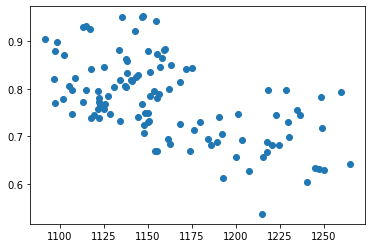

In [42]:
plt.scatter(x=a3["Weekly Wages AB"], y=a3["Rate"])

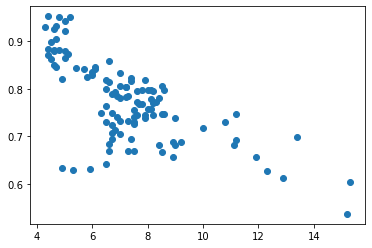

<AxesSubplot:xlabel='Y-M'>

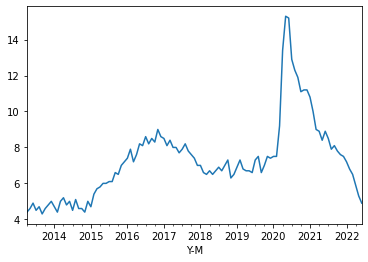

In [44]:
series=a3["Unemployment AB"]
series.plot()

<AxesSubplot:xlabel='Y-M'>

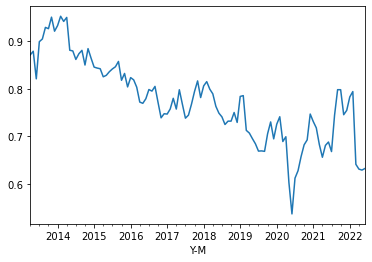

In [45]:
series2=a3["Rate"]
series2.plot()

<AxesSubplot:xlabel='Y-M'>

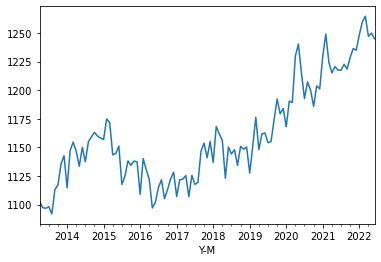

In [46]:
series3=a3["Weekly Wages AB"]
series3.plot()

In [ ]:
# add month column on top month index
a3["Month"]=a3.

KeyError: 'Y-M'

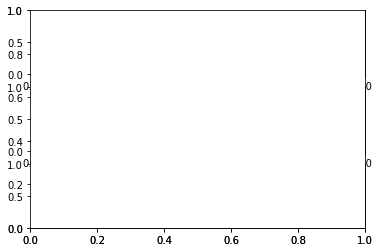

In [95]:
fig, ax=plt.subplots(3,1)
ax[0].plot(x=a3["Y-M"], y=a3["Rate"])
a3.plot(x="Y-M", y=a3["Rate"])
plot.title("Shelter Admission Rate")

ax.plot(x, y)
ax.set_title('A single plot')
# for i in range(3):
#     ax[i]= fig.add_subplot()
#     data.plot(x=time, y=columns[i+2])
#     plot.title(name(a3[columns[i+2]])

